In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts

In [2]:
data = pd.read_csv('TS.csv')

In [3]:
data.head()

,Date,Price
0,1-Jan-17,1435
1,2-Jan-17,3895
2,3-Jan-17,8270
3,4-Jan-17,11390
4,5-Jan-17,6545


In [4]:
data.dtypes

Date     object
Price     int64
dtype: object

In [5]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data.Date)

In [7]:
data.dtypes

Date     datetime64[ns]
Price             int64
dtype: object

In [8]:
data = data.set_index('Date')

In [9]:
data.head()

,Price
Date,
2017-01-01,1435
2017-01-02,3895
2017-01-03,8270
2017-01-04,11390
2017-01-05,6545


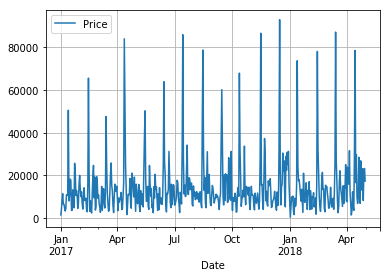

In [10]:
%matplotlib inline
data.plot(grid = 'on')

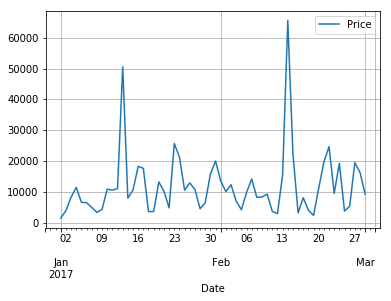

In [13]:
from datetime import datetime as dte

start_date = dte(2017,1,1)
end_date = dte(2017,3,1)
data[(start_date<=data.index)&(data.index<=end_date)].plot(grid='on')

Time Series Analysis

Additive Model
Y(t) = Trend(t) + Residual(t) + Seasonility(t)

In [15]:
import statsmodels.api as sm

C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


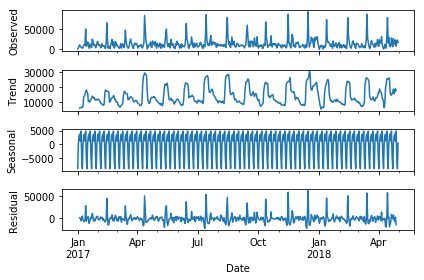

In [16]:
model = sm.tsa.seasonal_decompose(data, model='additive')
fig = model.plot()

In [18]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

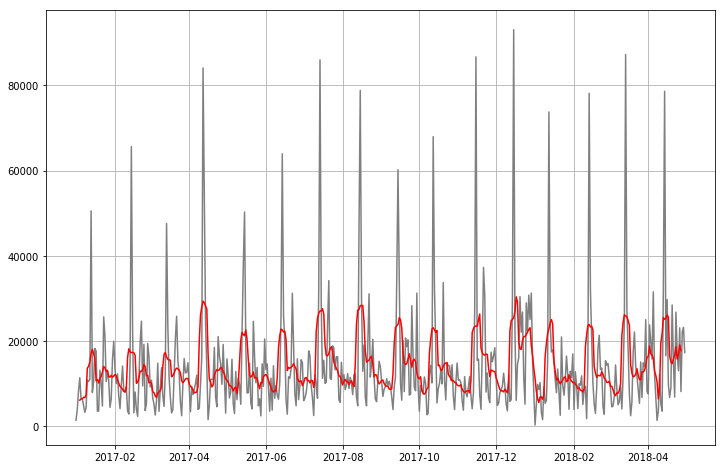

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.grid(True)

plt.plot(data.index, data['Price'], c='gray')
plt.plot(model.trend.index, model.trend, c='red')

In [21]:
import matplotlib.pyplot as plt